<a href="https://colab.research.google.com/github/TheAmirHK/BayesianOptimization/blob/main/BayesianOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from tqdm import tqdm

In [366]:
# In[minimize the obj]
def objective(x):
    return np.sin(3*x)*x**2 - np.cos(0.7*x)

In [367]:
# In[gaussian kernel]
def kernel(X1, X2, length_scale=1.5, sigma_f=3.0):
    sqdist = np.sum(X1**2, 1).reshape(-1,1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

In [368]:
# In[gaussian process]
class GaussianProcess:
    def __init__(self, X_train, Y_train, noise=1e-6):
        self.X_train = X_train
        self.Y_train = Y_train
        self.noise = noise
        self.K = kernel(X_train, X_train) + noise**2 * np.eye(len(X_train))

    def predict(self, X_s):

        K_s = kernel(self.X_train, X_s)
        K_ss = kernel(X_s, X_s) + self.noise**2 * np.eye(len(X_s))  # test cov
        K_inv = np.linalg.inv(self.K)

        mu_s = K_s.T @ K_inv @ self.Y_train  # mean
        cov_s = K_ss - K_s.T @ K_inv @ K_s  # cov matrix
        std_s = np.sqrt(np.diag(cov_s))

        return mu_s.flatten(), std_s.flatten()

In [369]:
def expected_improvement(X, gp, Y_best, xi=0.01):

    mu, std = gp.predict(X)
    improvement = mu - Y_best - xi
    Z = improvement / std
    ei = improvement * stats.norm.cdf(Z) + std * stats.norm.pdf(Z)
    ei[std == 0] = 0
    return ei

In [370]:
# bayesian optimization
def bayesian_optimization(n_iters=50):

    # rand samples
    X_train = np.random.uniform(-10, 10, size=(20, 1))
    Y_train = objective(X_train)

    for i in tqdm(range(n_iters)):

        gp = GaussianProcess(X_train, Y_train)

        X_s = np.linspace(-10, 10, 100).reshape(-1, 1)
        ei = expected_improvement(X_s, gp, np.min(Y_train))
        X_next = X_s[np.argmax(ei)]

        Y_next = objective(X_next)

        X_train = np.vstack((X_train, X_next))
        Y_train = np.append(Y_train, Y_next)

        plt.figure(figsize=(8, 4))
        plt.plot(X_s, objective(X_s), 'k--', label="True Function")
        plt.plot(X_train, Y_train, 'ro', label="Sampled Points")
        plt.plot(X_s, gp.predict(X_s)[0], 'b-', label="GP Mean")
        plt.fill_between(X_s.flatten(),
                         gp.predict(X_s)[0] - 1.96 * gp.predict(X_s)[1],
                         gp.predict(X_s)[0] + 1.96 * gp.predict(X_s)[1],
                         alpha=0.3, label="Confidence Interval")
        plt.axvline(X_next, color='green', linestyle="--", label="Next Query")
        plt.legend()
        plt.title(f"Iteration {i+1}")
        plt.show()

    return X_train[np.argmin(Y_train)], np.min(Y_train)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-368-f5200d1da993>:17: RuntimeWarning: invalid value encountered in sqrt
  std_s = np.sqrt(np.diag(cov_s))


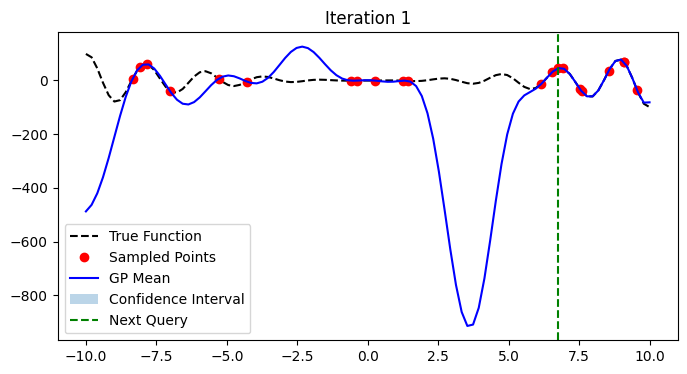

  1%|          | 1/100 [00:00<00:34,  2.87it/s]

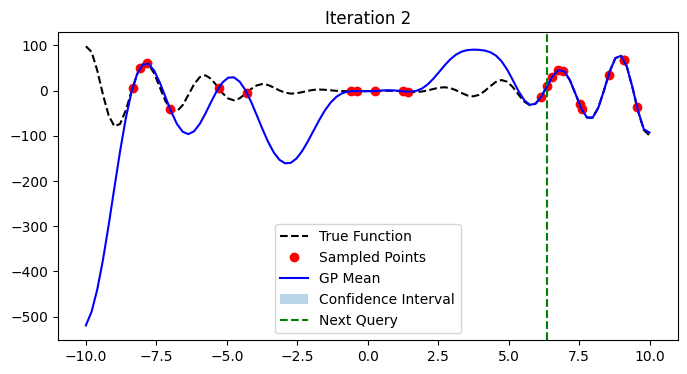

  2%|▏         | 2/100 [00:00<00:39,  2.45it/s]

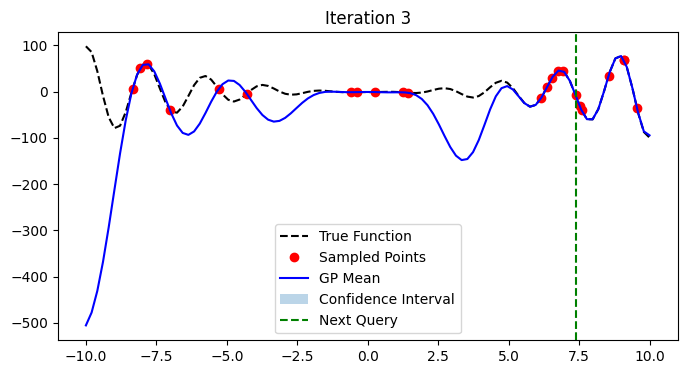

  3%|▎         | 3/100 [00:01<00:38,  2.55it/s]

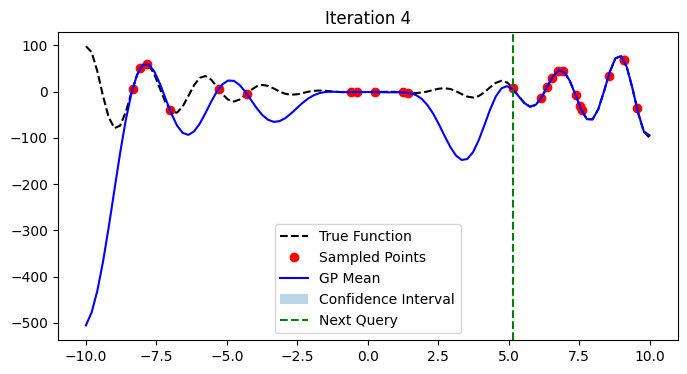

  4%|▍         | 4/100 [00:01<00:32,  2.94it/s]

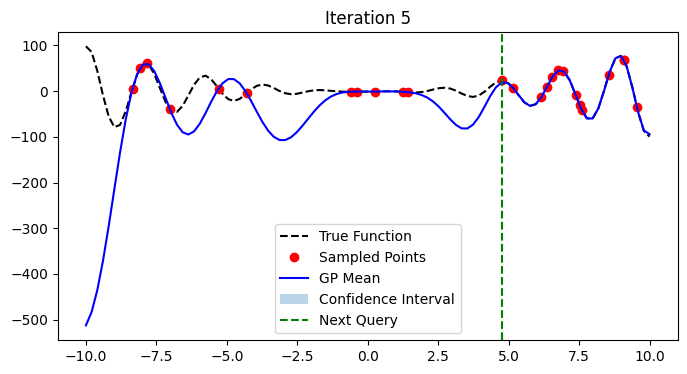

  5%|▌         | 5/100 [00:01<00:36,  2.64it/s]

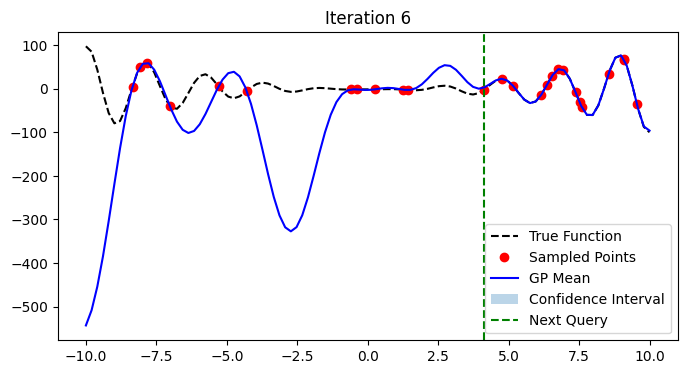

  6%|▌         | 6/100 [00:02<00:32,  2.92it/s]

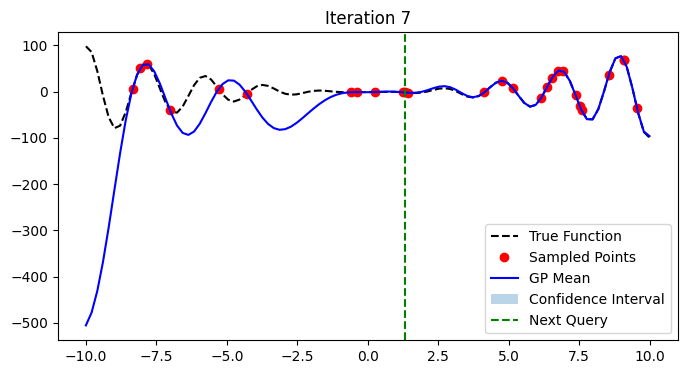

  7%|▋         | 7/100 [00:02<00:29,  3.17it/s]

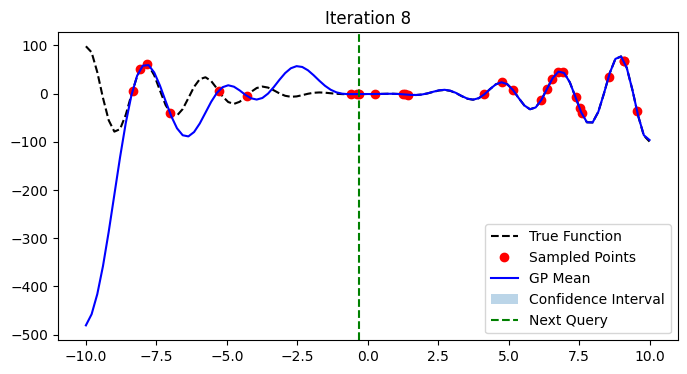

  8%|▊         | 8/100 [00:02<00:27,  3.34it/s]

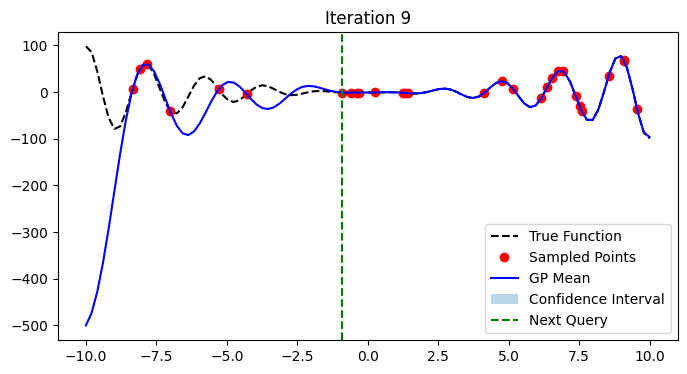

  9%|▉         | 9/100 [00:02<00:26,  3.38it/s]

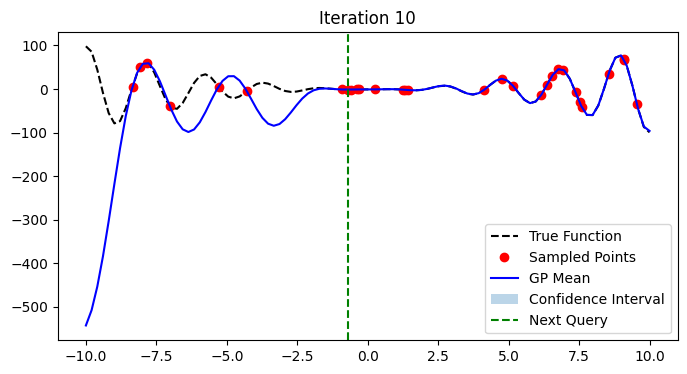

 10%|█         | 10/100 [00:03<00:25,  3.50it/s]

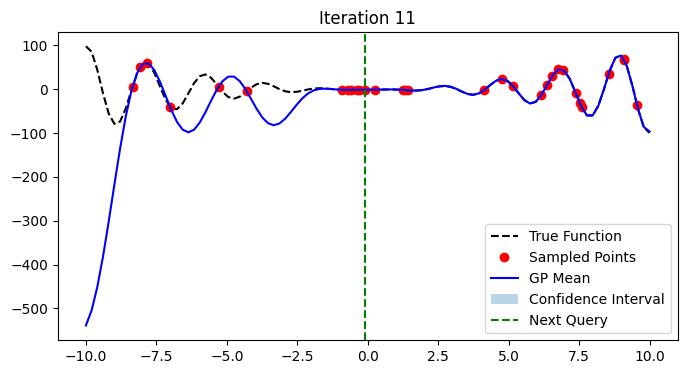

 11%|█         | 11/100 [00:03<00:25,  3.56it/s]

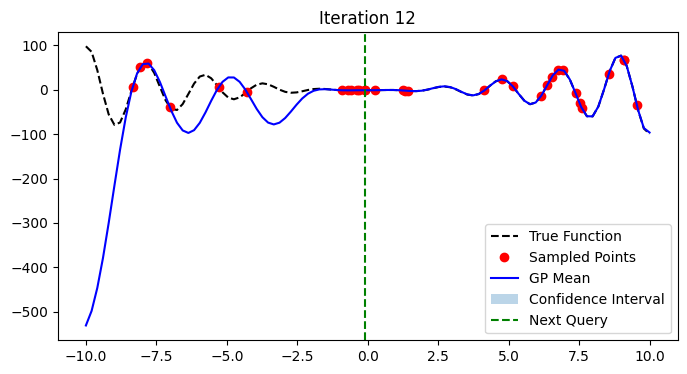

 12%|█▏        | 12/100 [00:03<00:24,  3.55it/s]

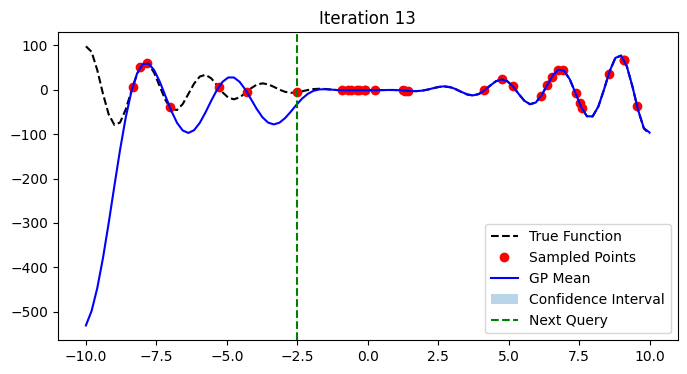

 13%|█▎        | 13/100 [00:04<00:24,  3.59it/s]

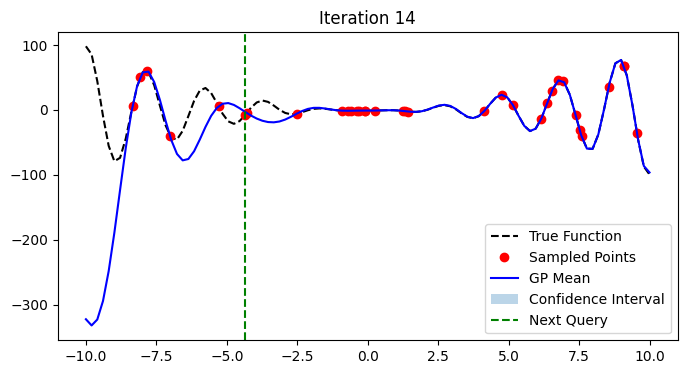

 14%|█▍        | 14/100 [00:04<00:23,  3.67it/s]

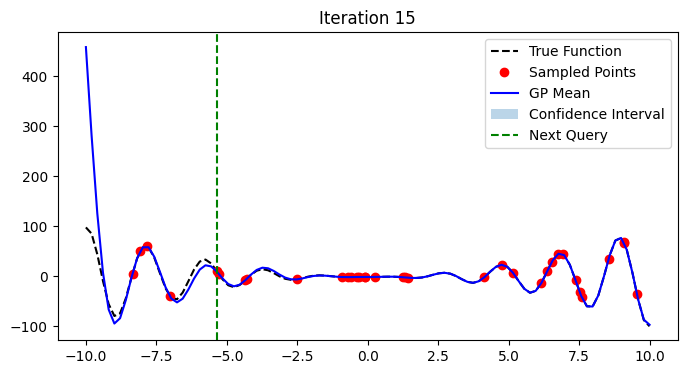

 15%|█▌        | 15/100 [00:04<00:22,  3.70it/s]

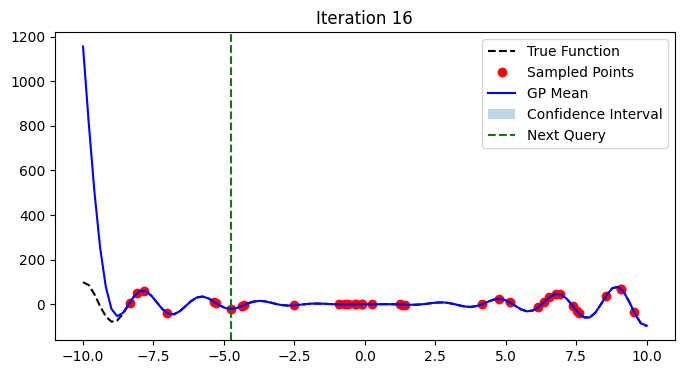

 16%|█▌        | 16/100 [00:04<00:23,  3.65it/s]

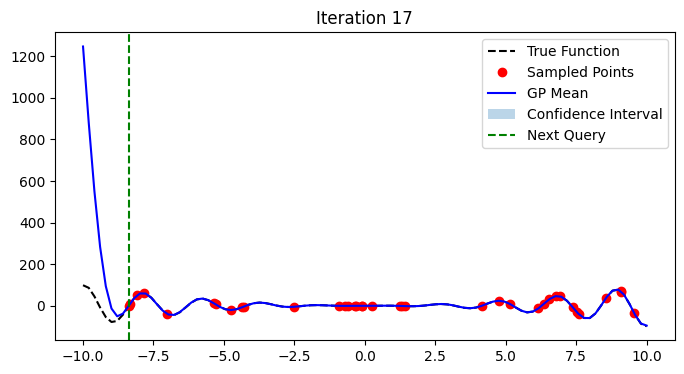

 17%|█▋        | 17/100 [00:05<00:22,  3.67it/s]

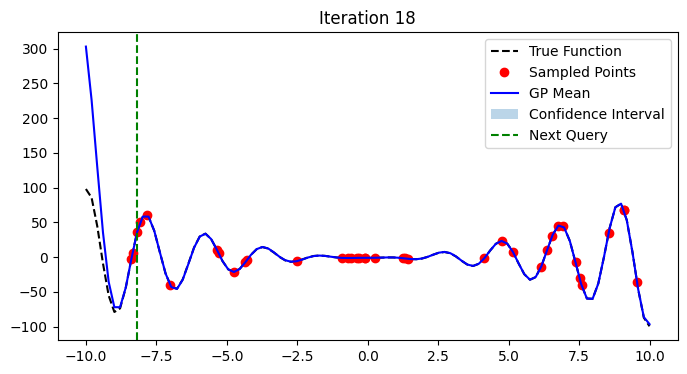

 18%|█▊        | 18/100 [00:05<00:22,  3.59it/s]

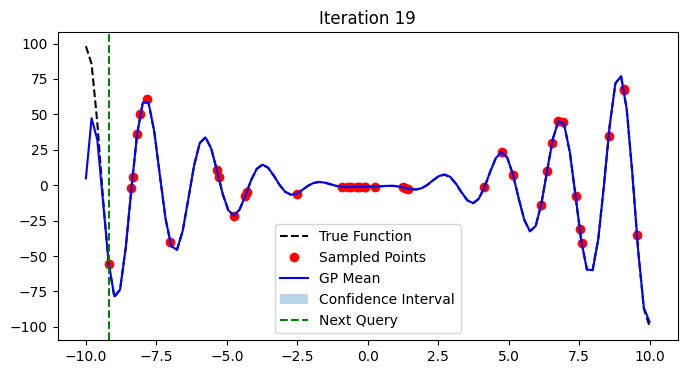

 19%|█▉        | 19/100 [00:05<00:23,  3.45it/s]

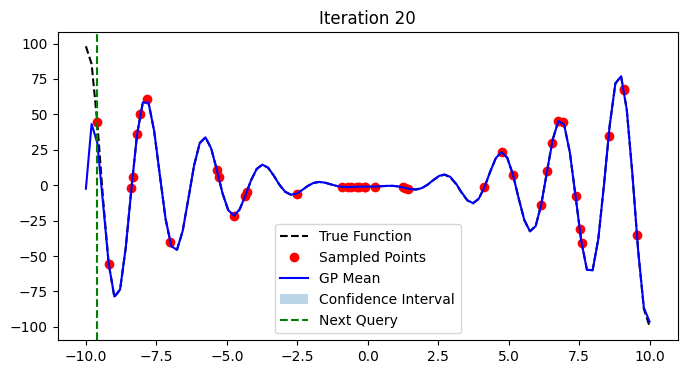

 20%|██        | 20/100 [00:06<00:24,  3.30it/s]

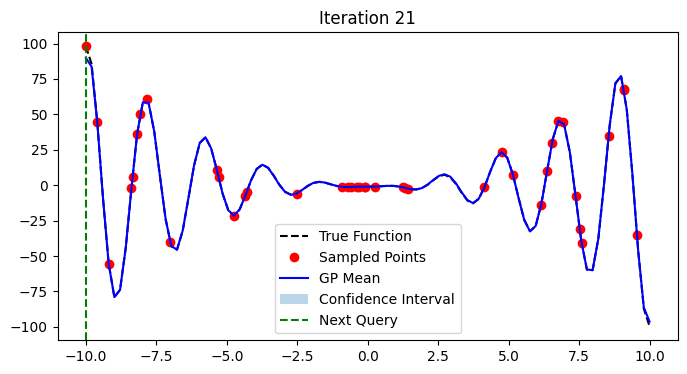

 21%|██        | 21/100 [00:06<00:28,  2.80it/s]

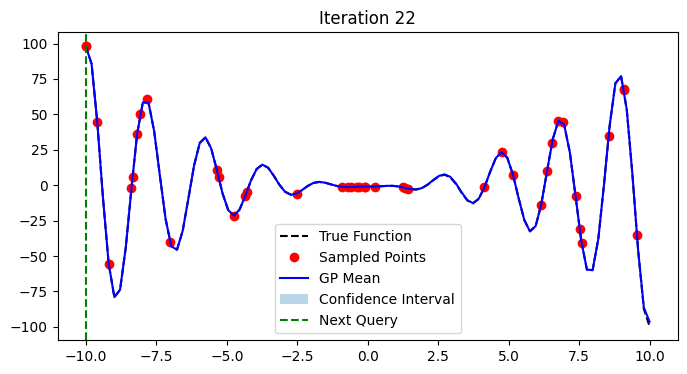

 22%|██▏       | 22/100 [00:06<00:27,  2.85it/s]

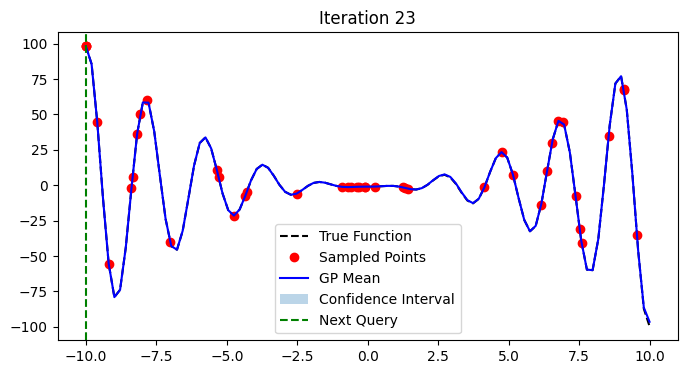

 23%|██▎       | 23/100 [00:07<00:26,  2.90it/s]

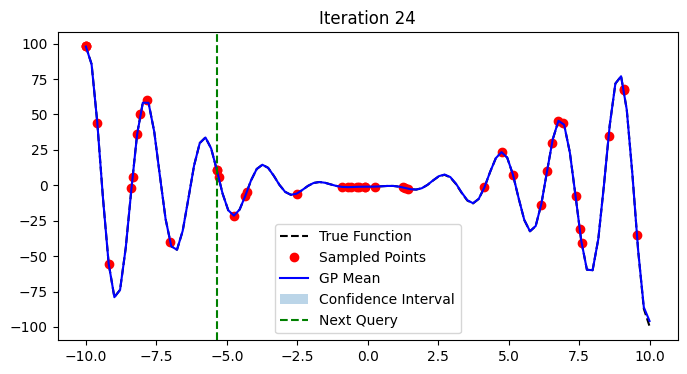

 24%|██▍       | 24/100 [00:07<00:25,  2.95it/s]

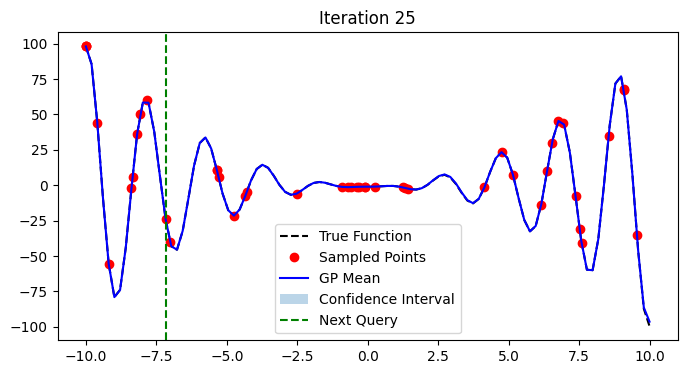

 25%|██▌       | 25/100 [00:07<00:24,  3.00it/s]

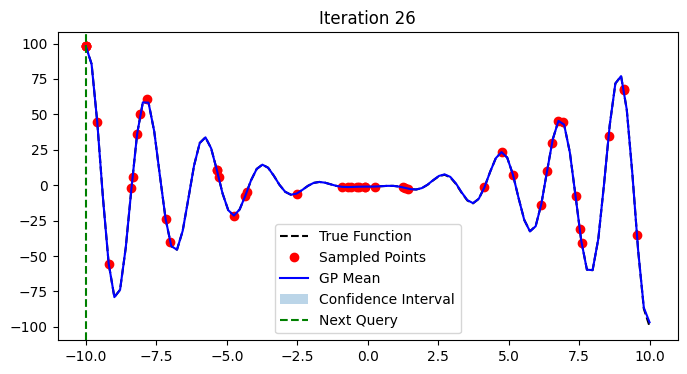

 26%|██▌       | 26/100 [00:08<00:24,  3.01it/s]

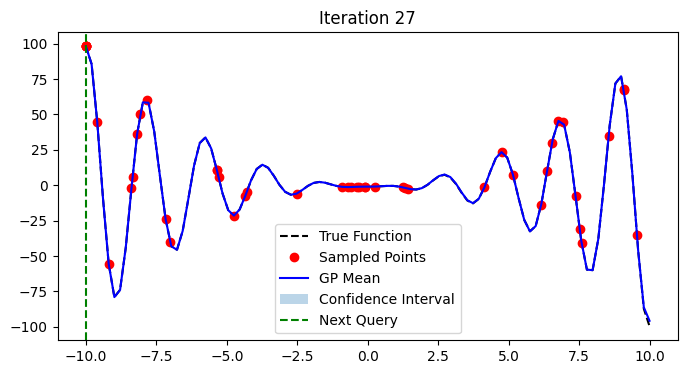

 27%|██▋       | 27/100 [00:08<00:24,  3.03it/s]

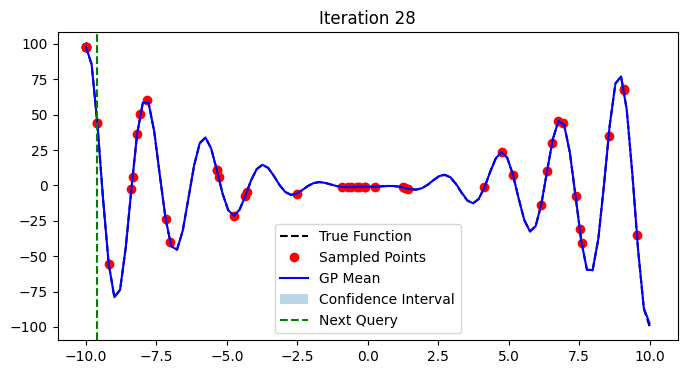

 28%|██▊       | 28/100 [00:08<00:23,  3.00it/s]

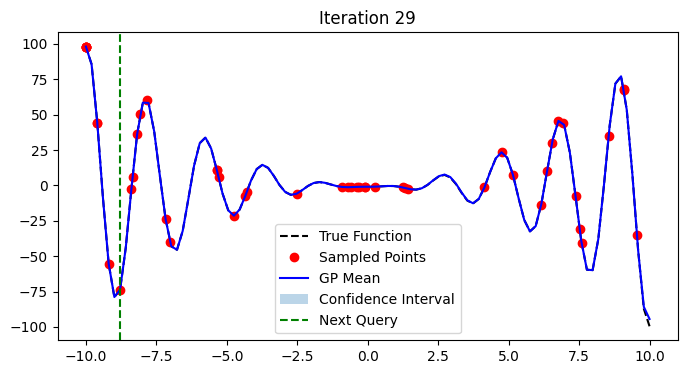

 29%|██▉       | 29/100 [00:09<00:23,  3.02it/s]

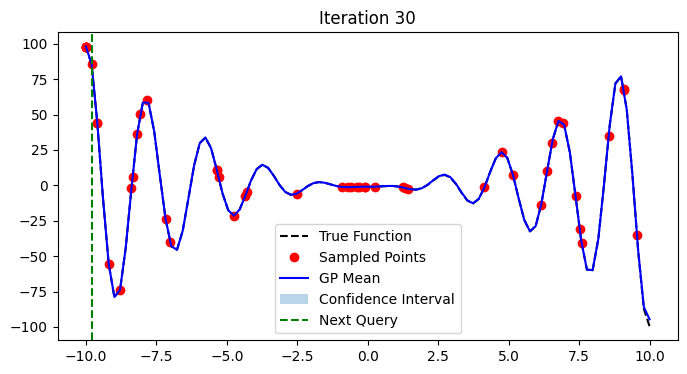

 30%|███       | 30/100 [00:09<00:23,  2.99it/s]

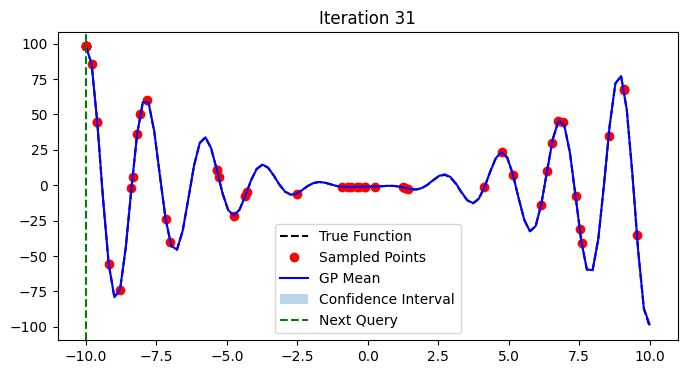

 31%|███       | 31/100 [00:09<00:23,  3.00it/s]

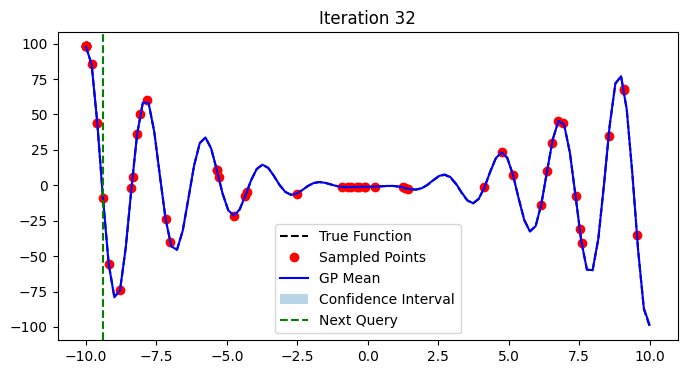

 32%|███▏      | 32/100 [00:10<00:22,  3.08it/s]

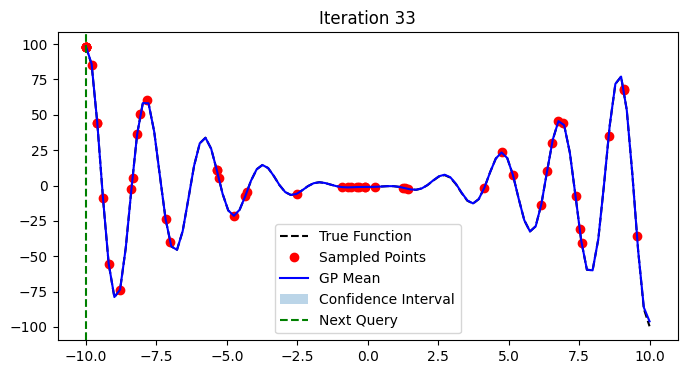

 33%|███▎      | 33/100 [00:10<00:21,  3.11it/s]

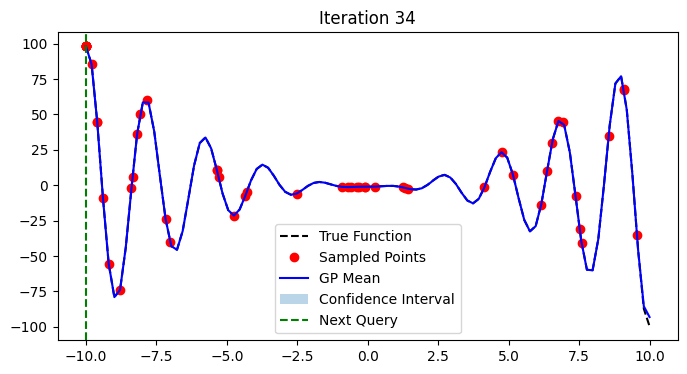

 34%|███▍      | 34/100 [00:10<00:21,  3.09it/s]

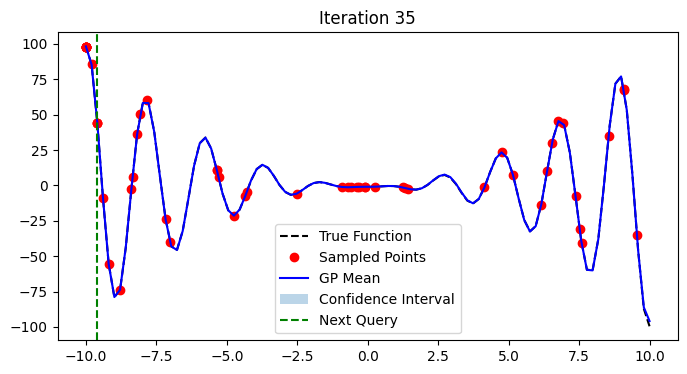

 35%|███▌      | 35/100 [00:11<00:21,  3.01it/s]

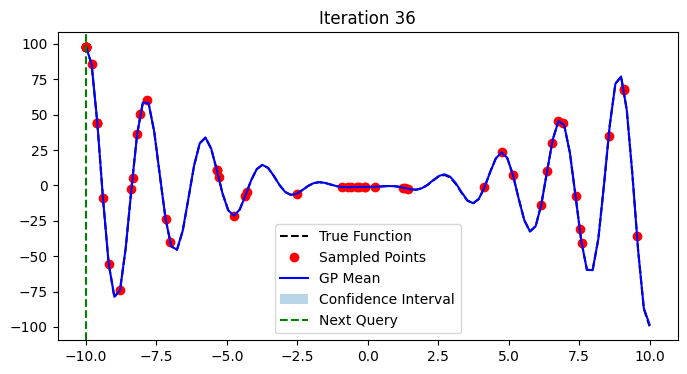

 36%|███▌      | 36/100 [00:11<00:27,  2.36it/s]

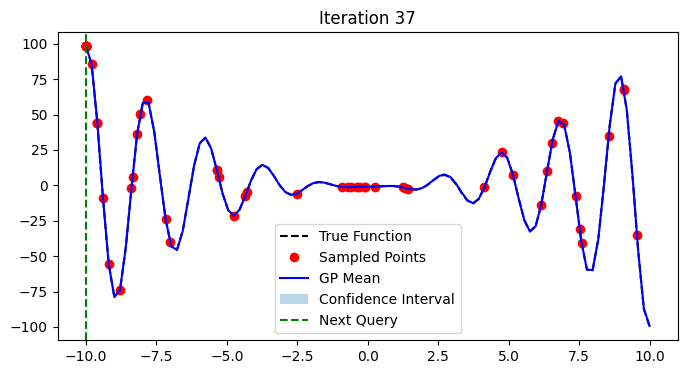

 37%|███▋      | 37/100 [00:12<00:26,  2.38it/s]

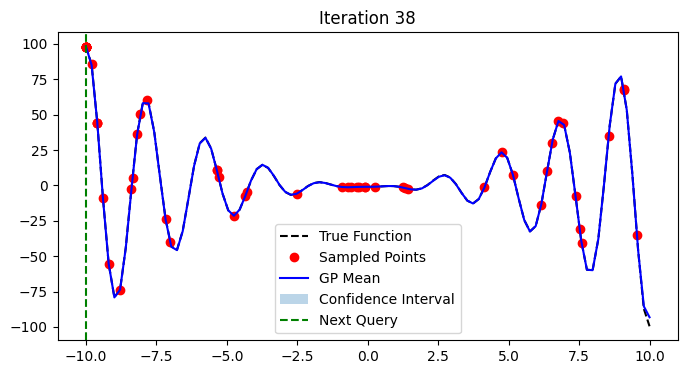

 38%|███▊      | 38/100 [00:12<00:26,  2.32it/s]

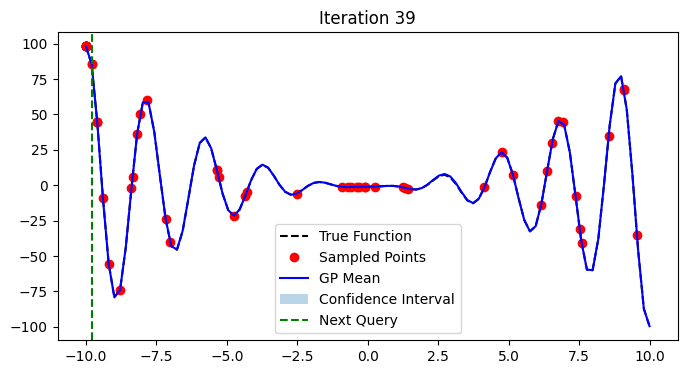

 39%|███▉      | 39/100 [00:13<00:26,  2.30it/s]

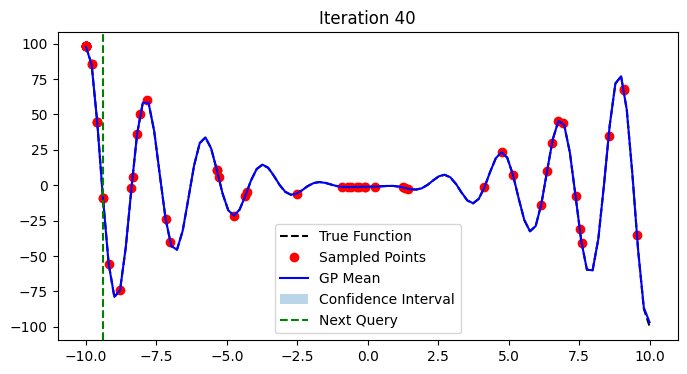

 40%|████      | 40/100 [00:13<00:27,  2.21it/s]

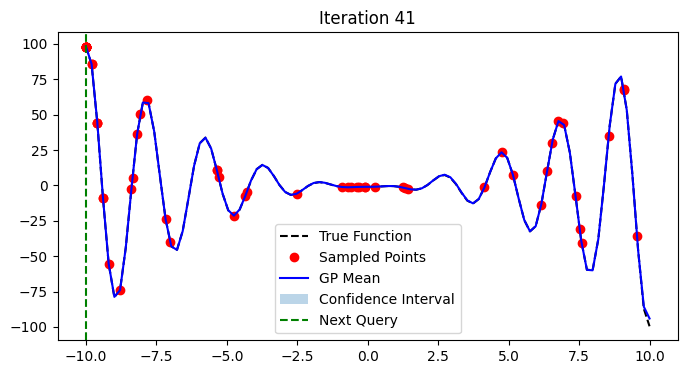

 41%|████      | 41/100 [00:14<00:27,  2.17it/s]

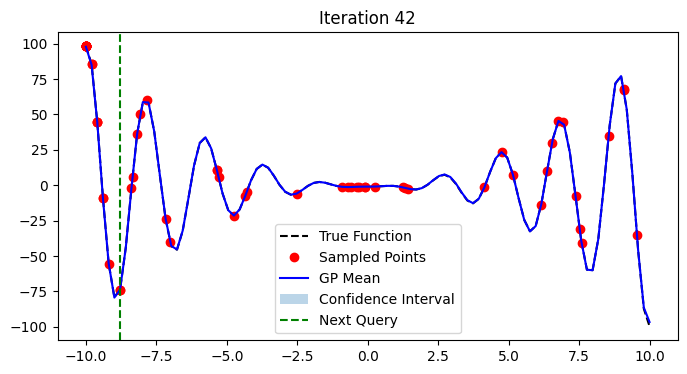

 42%|████▏     | 42/100 [00:14<00:27,  2.13it/s]

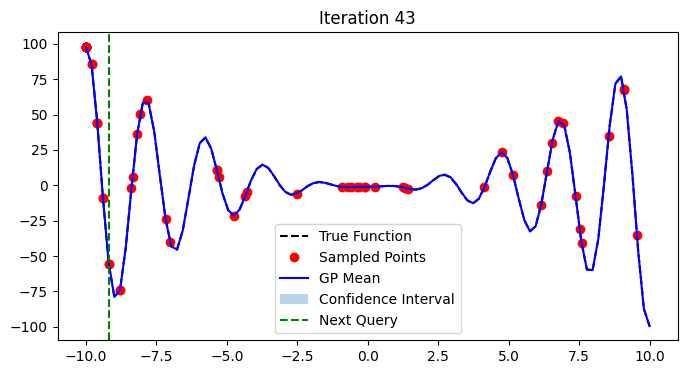

 43%|████▎     | 43/100 [00:14<00:24,  2.33it/s]

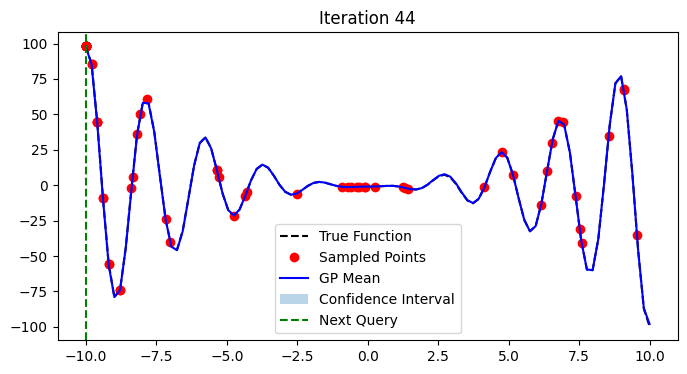

 44%|████▍     | 44/100 [00:15<00:22,  2.52it/s]

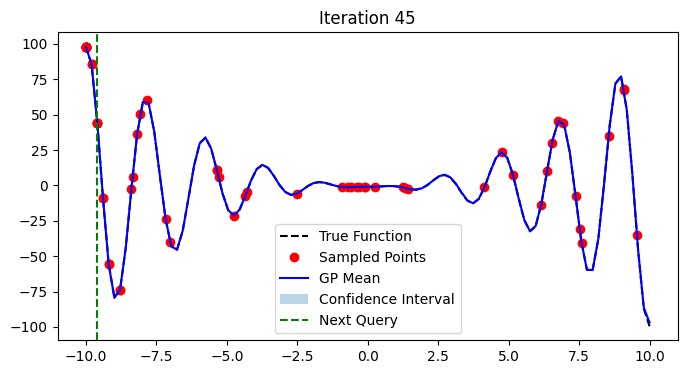

 45%|████▌     | 45/100 [00:15<00:20,  2.63it/s]

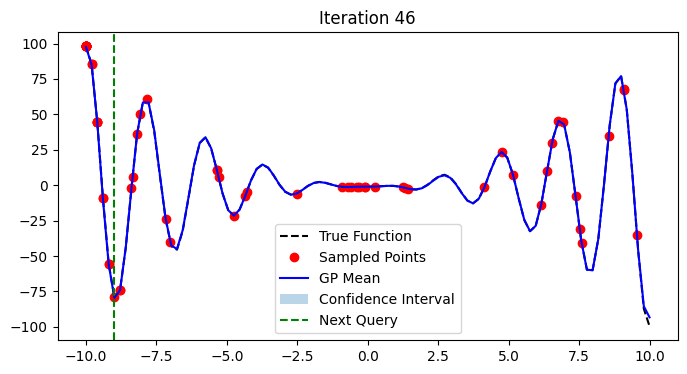

 46%|████▌     | 46/100 [00:15<00:19,  2.79it/s]

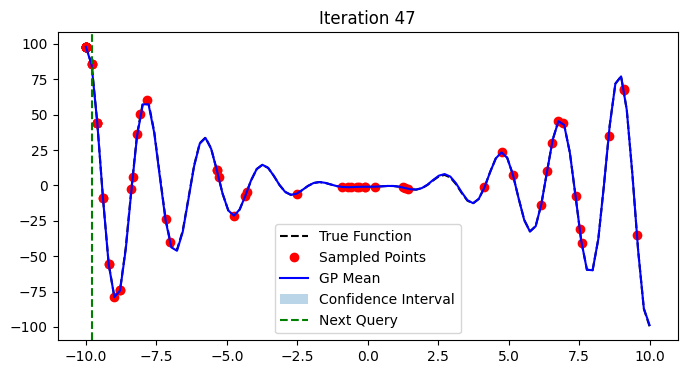

 47%|████▋     | 47/100 [00:16<00:18,  2.88it/s]

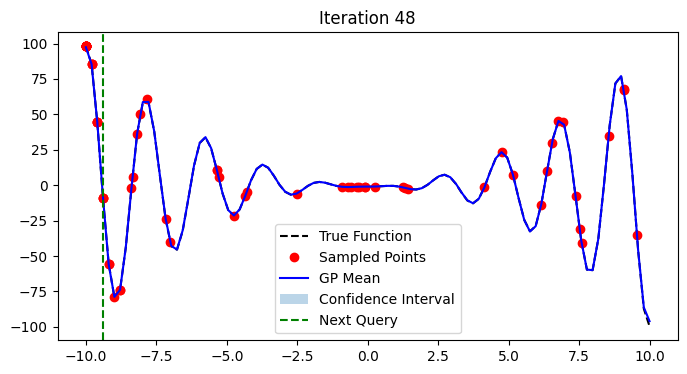

 48%|████▊     | 48/100 [00:16<00:18,  2.88it/s]

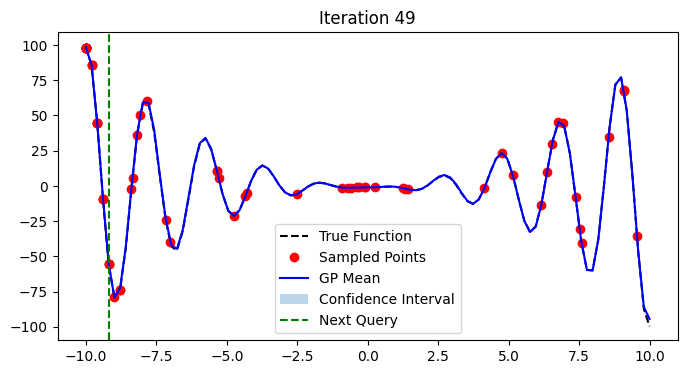

 49%|████▉     | 49/100 [00:16<00:17,  2.87it/s]

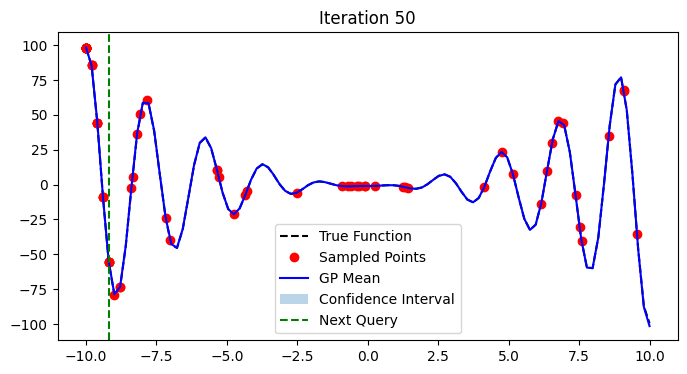

 50%|█████     | 50/100 [00:17<00:17,  2.89it/s]

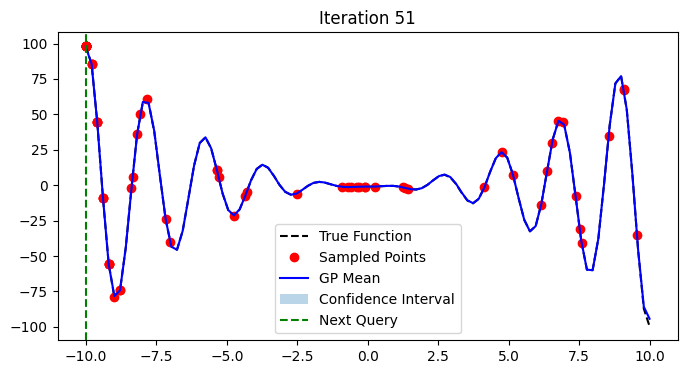

 51%|█████     | 51/100 [00:17<00:16,  2.94it/s]

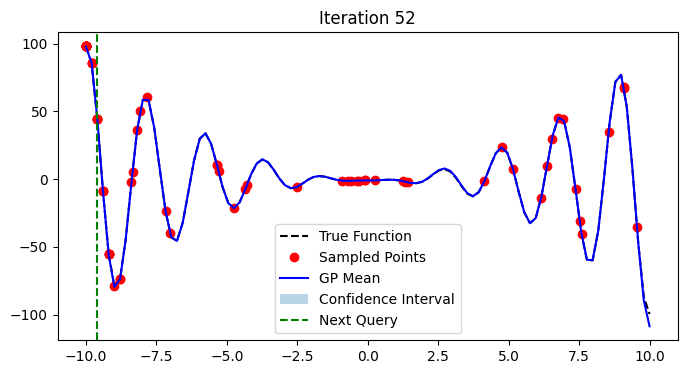

 52%|█████▏    | 52/100 [00:18<00:19,  2.50it/s]

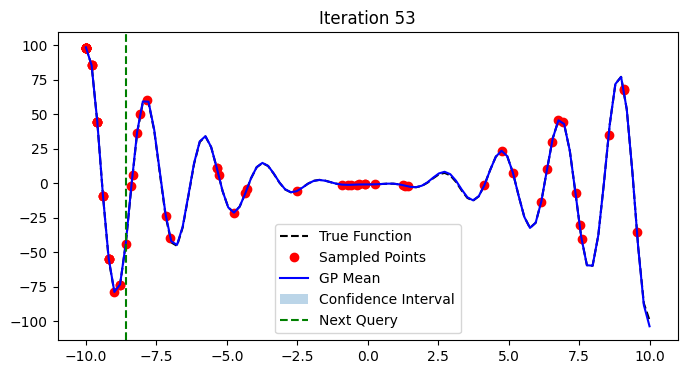

 53%|█████▎    | 53/100 [00:18<00:17,  2.65it/s]

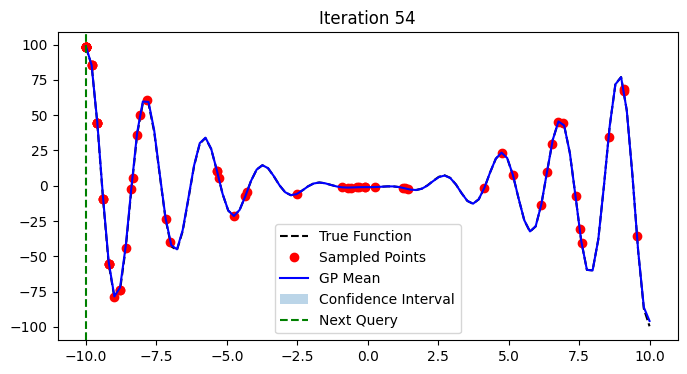

 54%|█████▍    | 54/100 [00:18<00:16,  2.76it/s]

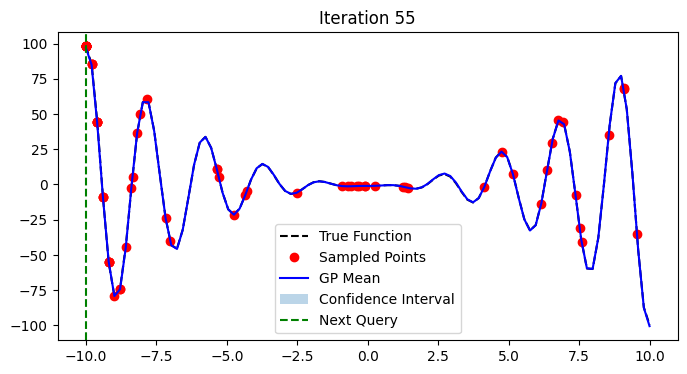

 55%|█████▌    | 55/100 [00:19<00:16,  2.75it/s]

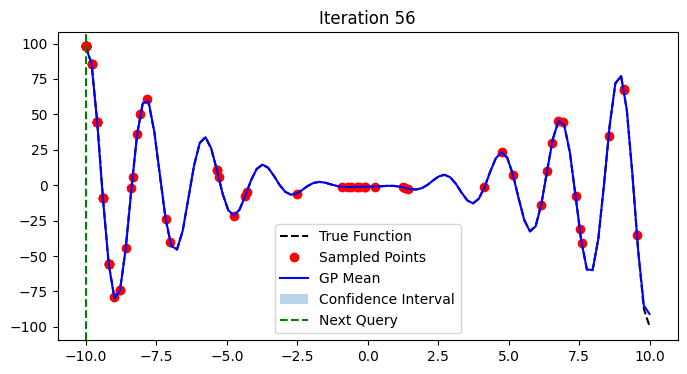

 56%|█████▌    | 56/100 [00:19<00:16,  2.72it/s]

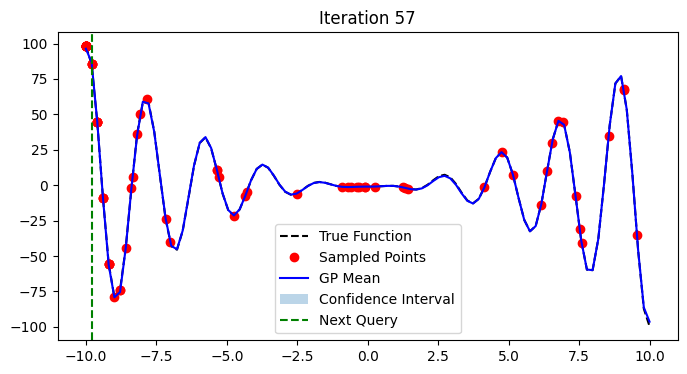

 57%|█████▋    | 57/100 [00:19<00:15,  2.72it/s]

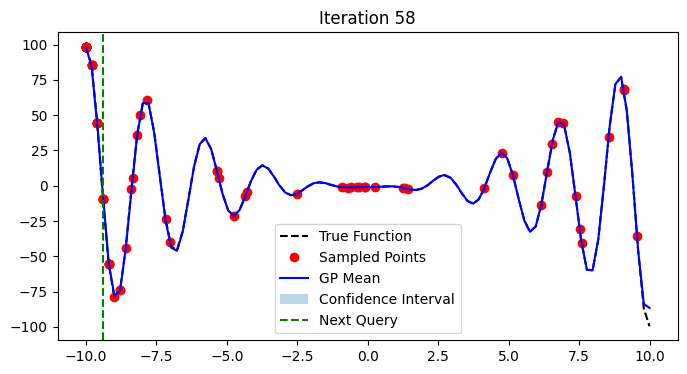

 58%|█████▊    | 58/100 [00:20<00:14,  2.80it/s]

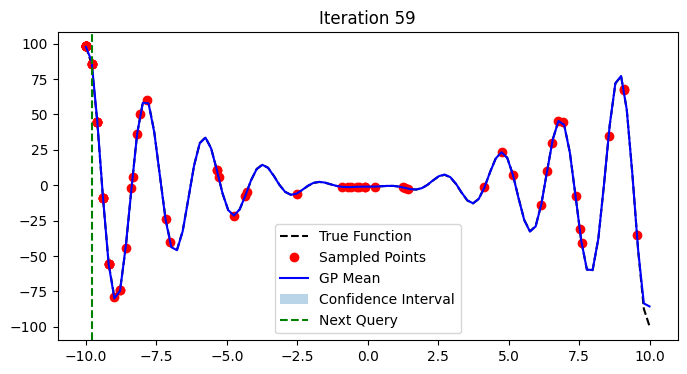

 59%|█████▉    | 59/100 [00:20<00:14,  2.81it/s]

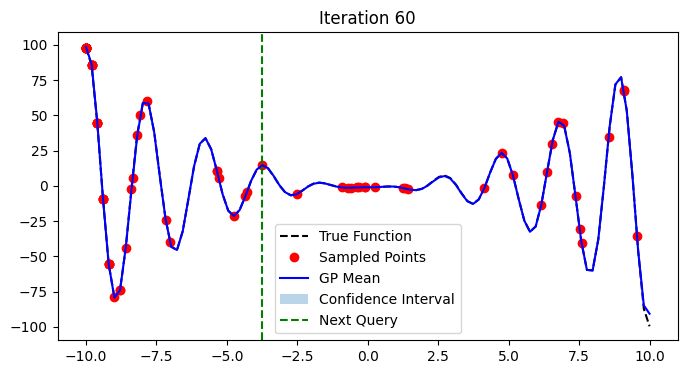

 60%|██████    | 60/100 [00:20<00:14,  2.83it/s]

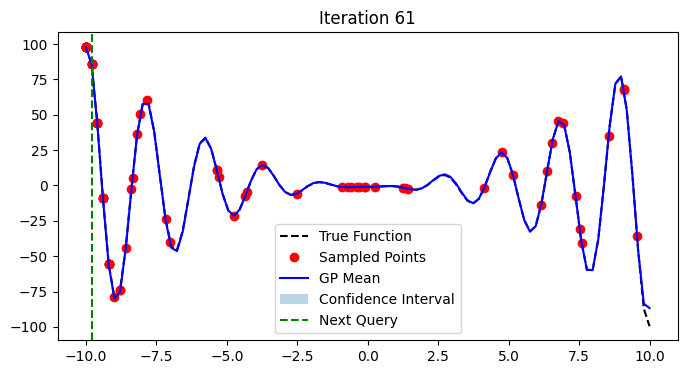

 61%|██████    | 61/100 [00:21<00:13,  2.85it/s]

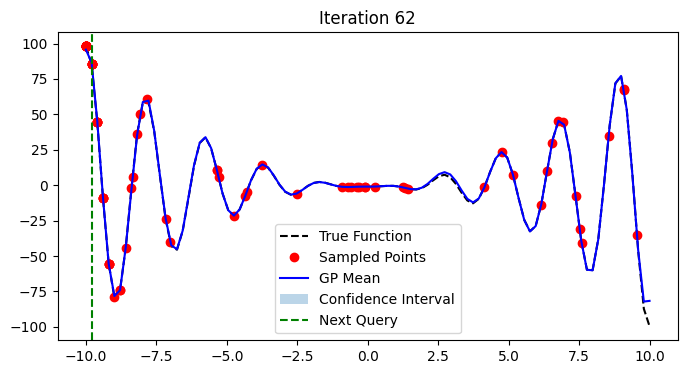

 62%|██████▏   | 62/100 [00:21<00:13,  2.92it/s]

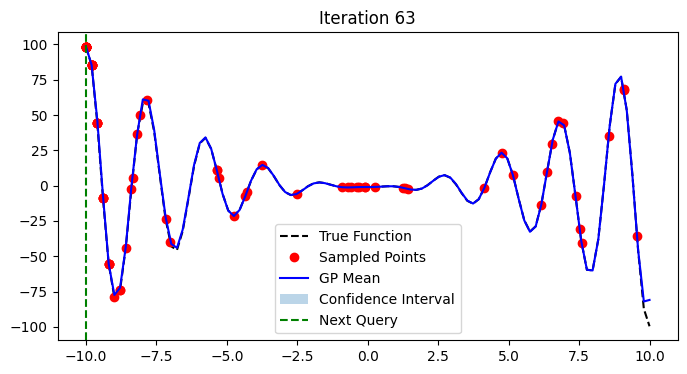

 63%|██████▎   | 63/100 [00:21<00:13,  2.84it/s]

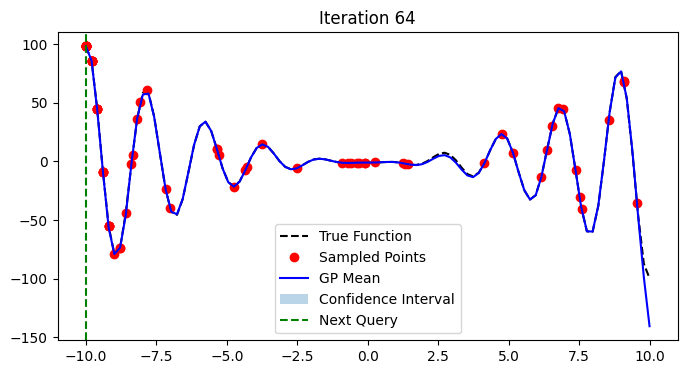

 64%|██████▍   | 64/100 [00:22<00:12,  2.90it/s]

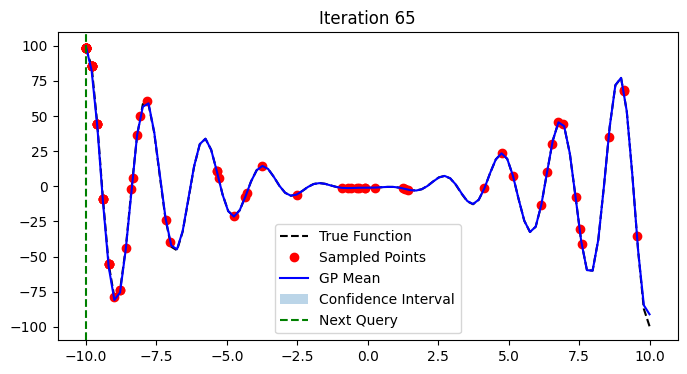

 65%|██████▌   | 65/100 [00:22<00:12,  2.90it/s]

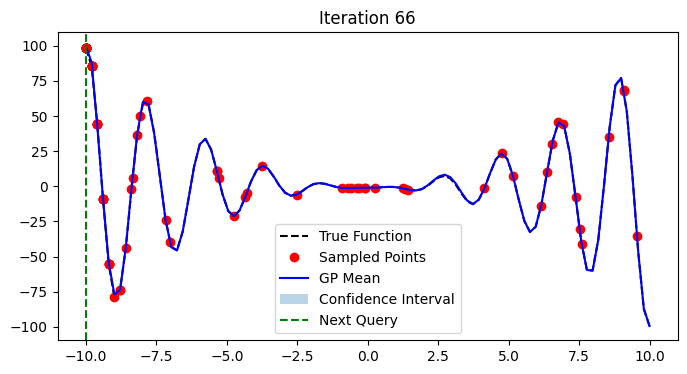

 66%|██████▌   | 66/100 [00:22<00:11,  2.92it/s]

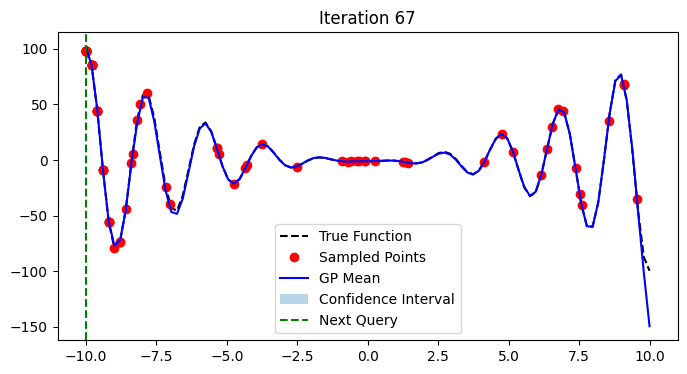

 67%|██████▋   | 67/100 [00:23<00:11,  2.98it/s]

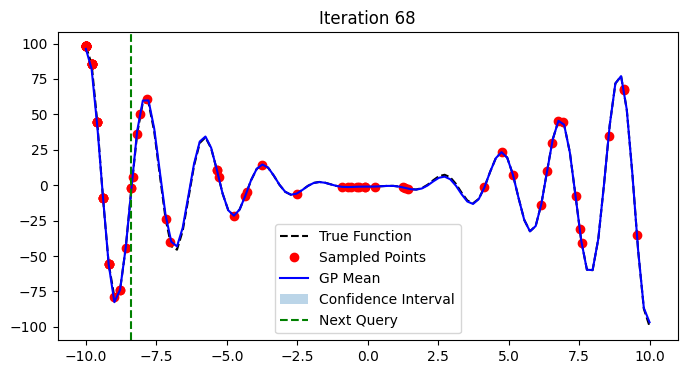

 68%|██████▊   | 68/100 [00:23<00:12,  2.56it/s]

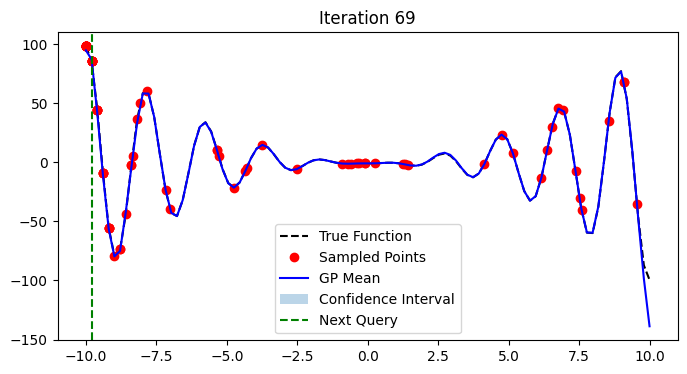

 69%|██████▉   | 69/100 [00:24<00:11,  2.66it/s]

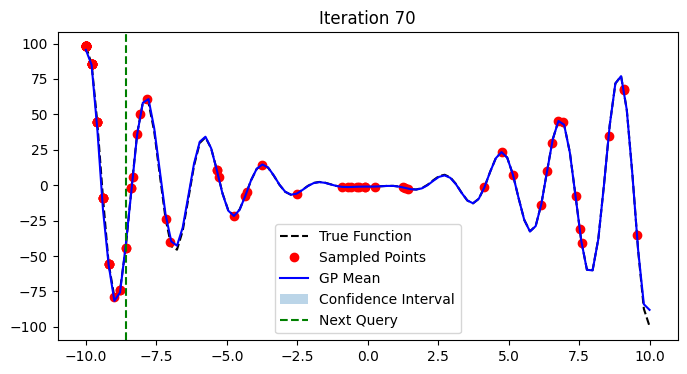

 70%|███████   | 70/100 [00:24<00:11,  2.71it/s]

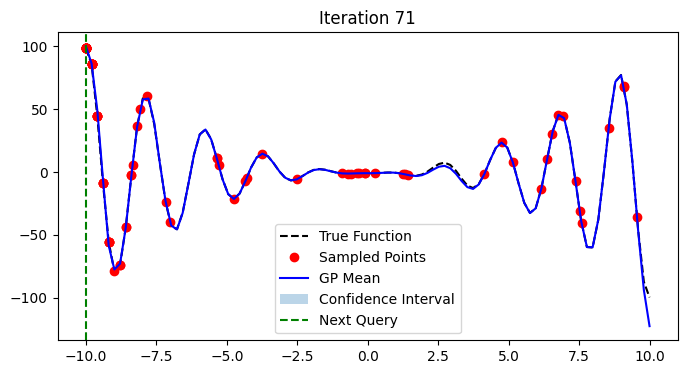

 71%|███████   | 71/100 [00:24<00:11,  2.51it/s]

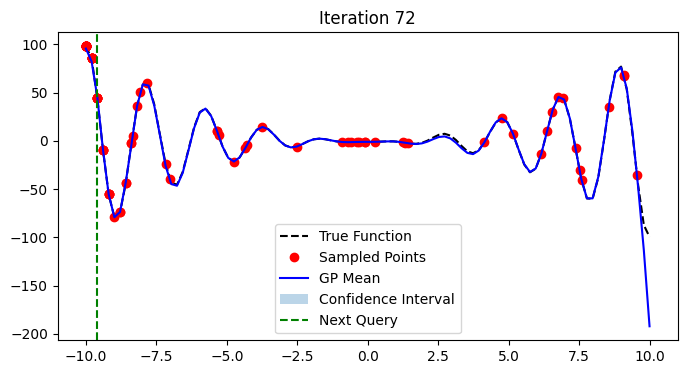

 72%|███████▏  | 72/100 [00:25<00:11,  2.39it/s]

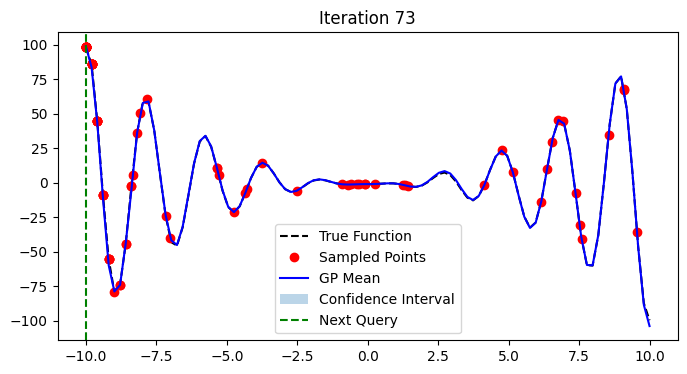

 73%|███████▎  | 73/100 [00:25<00:12,  2.25it/s]

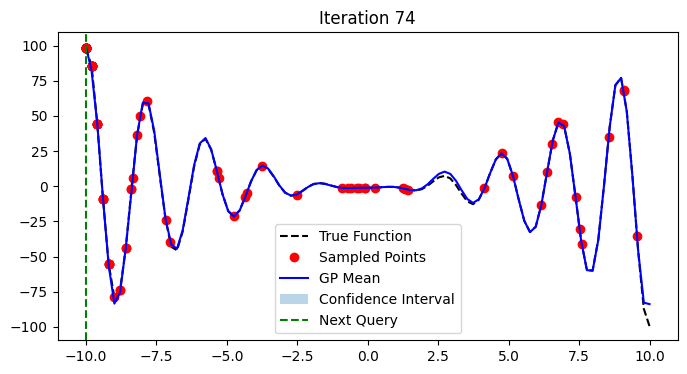

 74%|███████▍  | 74/100 [00:26<00:11,  2.19it/s]

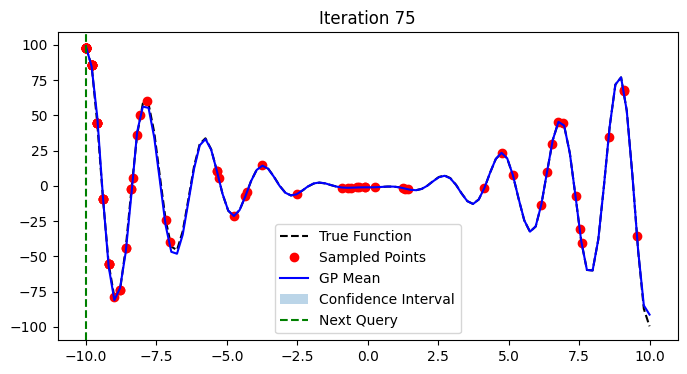

 75%|███████▌  | 75/100 [00:26<00:11,  2.13it/s]

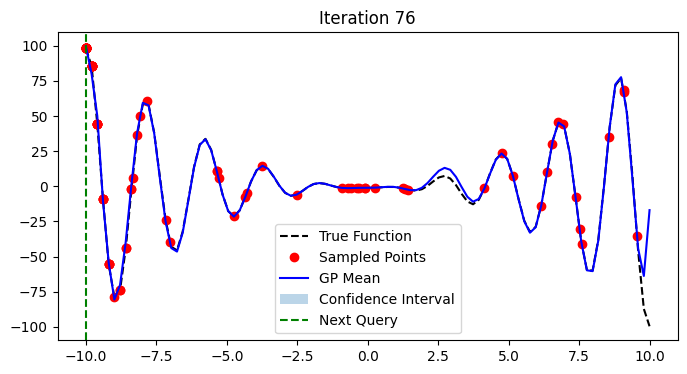

 76%|███████▌  | 76/100 [00:27<00:11,  2.02it/s]

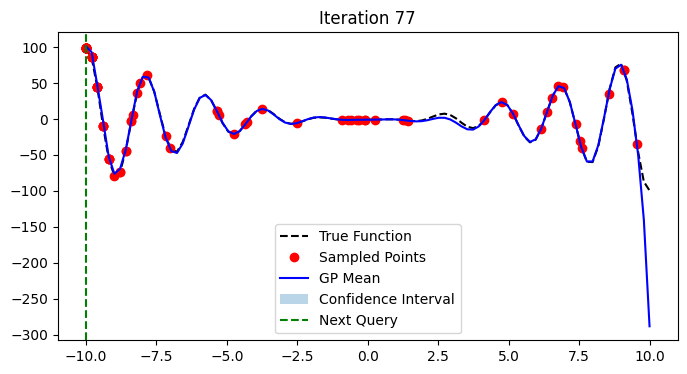

 77%|███████▋  | 77/100 [00:28<00:13,  1.65it/s]

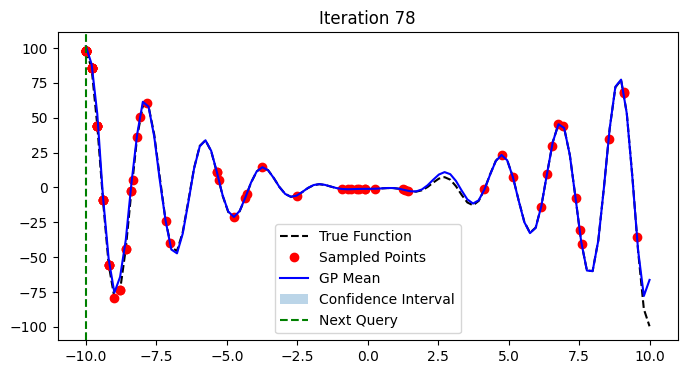

 78%|███████▊  | 78/100 [00:28<00:12,  1.71it/s]

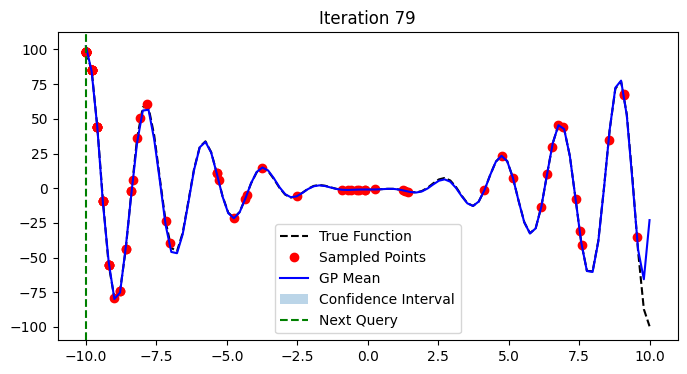

 79%|███████▉  | 79/100 [00:29<00:12,  1.68it/s]

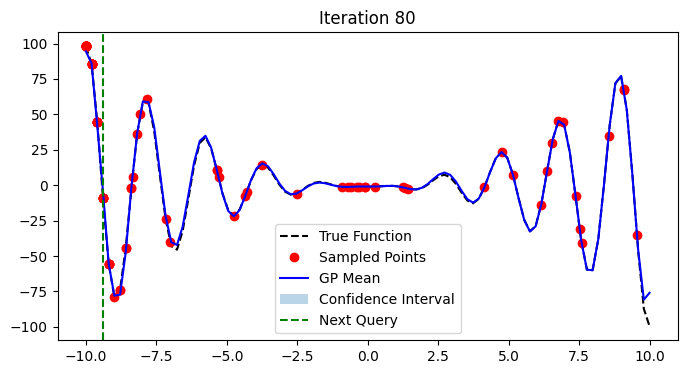

 80%|████████  | 80/100 [00:29<00:10,  1.91it/s]

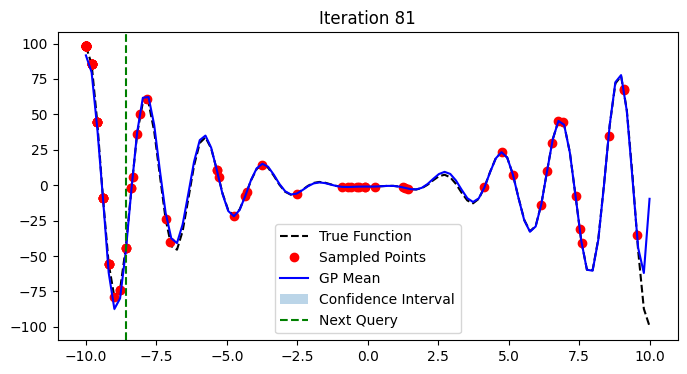

 81%|████████  | 81/100 [00:30<00:09,  2.09it/s]

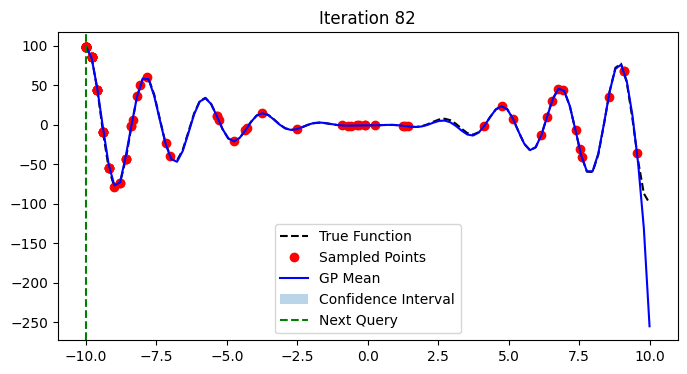

 82%|████████▏ | 82/100 [00:30<00:08,  2.22it/s]

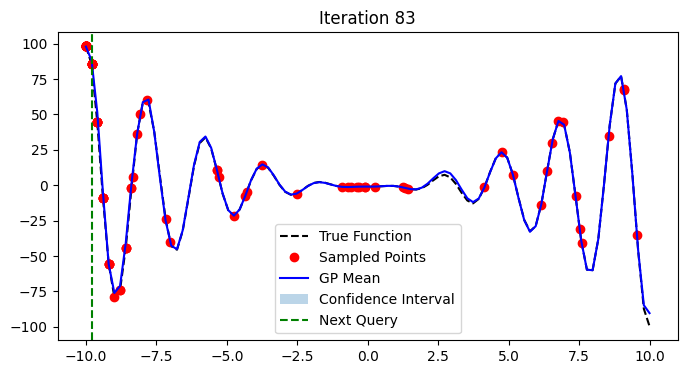

 83%|████████▎ | 83/100 [00:30<00:07,  2.41it/s]

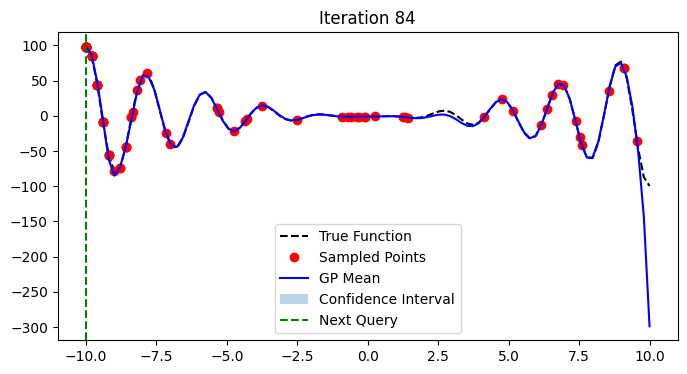

 84%|████████▍ | 84/100 [00:31<00:07,  2.25it/s]

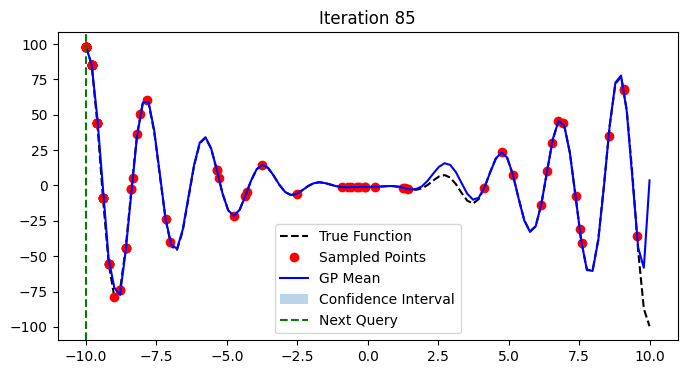

 85%|████████▌ | 85/100 [00:31<00:06,  2.37it/s]

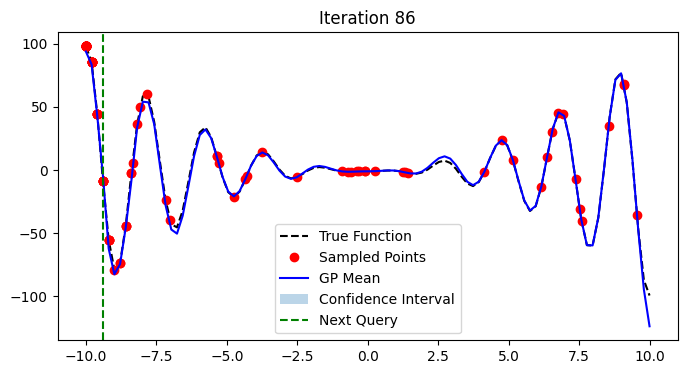

 86%|████████▌ | 86/100 [00:32<00:05,  2.56it/s]

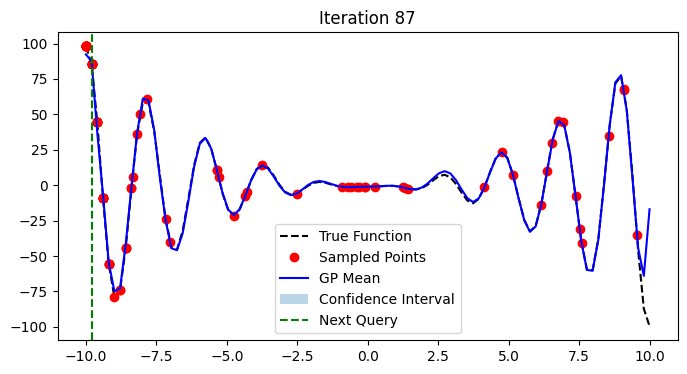

 87%|████████▋ | 87/100 [00:32<00:04,  2.61it/s]

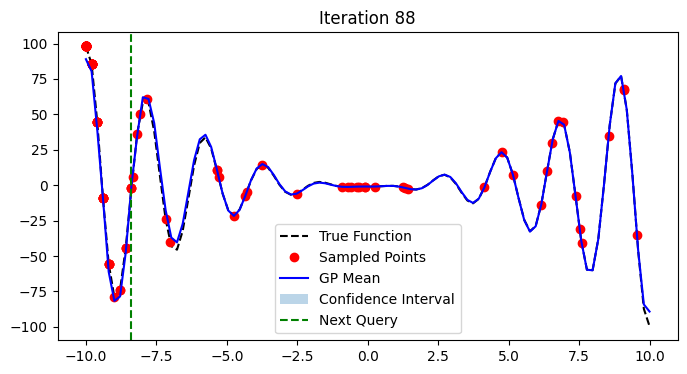

 88%|████████▊ | 88/100 [00:32<00:04,  2.56it/s]

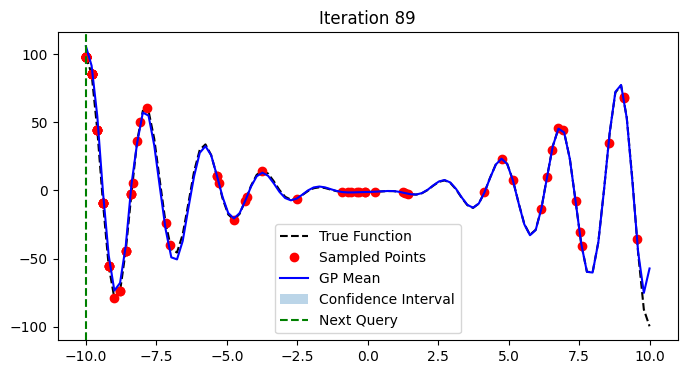

 89%|████████▉ | 89/100 [00:33<00:04,  2.65it/s]

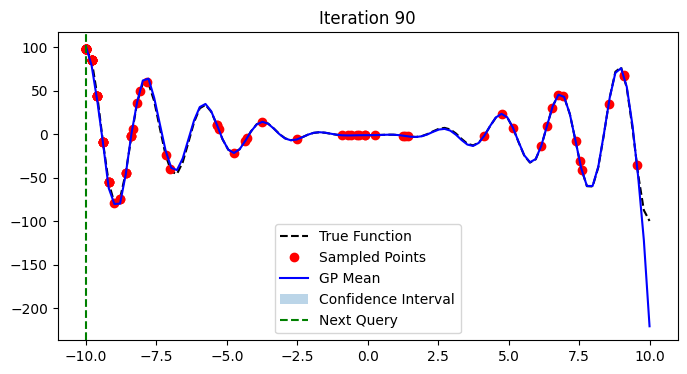

 90%|█████████ | 90/100 [00:33<00:03,  2.77it/s]

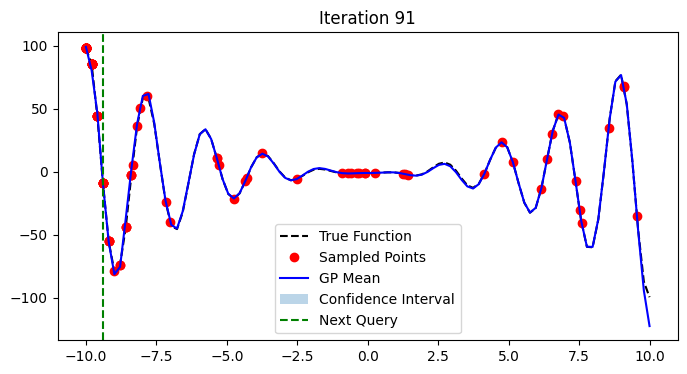

 91%|█████████ | 91/100 [00:33<00:03,  2.80it/s]

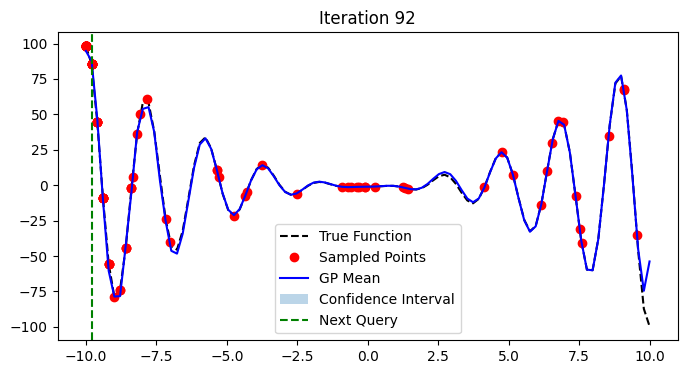

 92%|█████████▏| 92/100 [00:34<00:02,  2.72it/s]

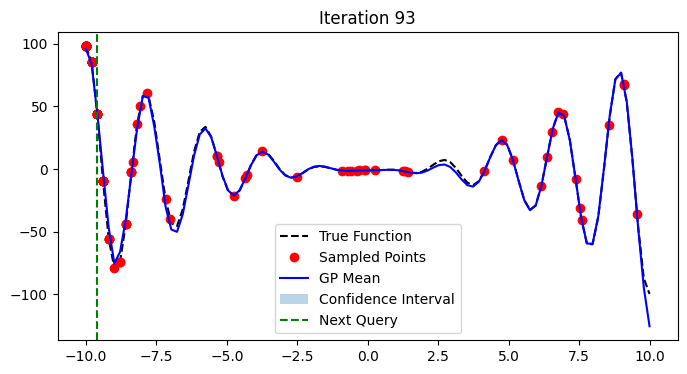

 93%|█████████▎| 93/100 [00:34<00:02,  2.75it/s]

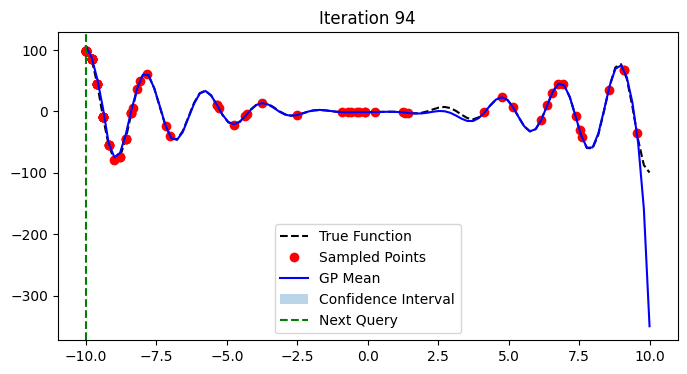

 94%|█████████▍| 94/100 [00:34<00:02,  2.81it/s]

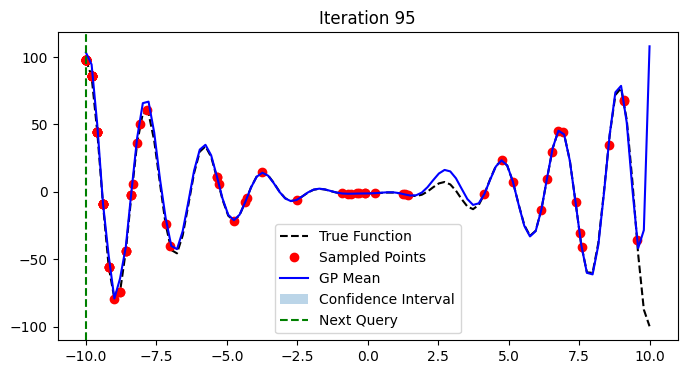

 95%|█████████▌| 95/100 [00:35<00:01,  2.81it/s]

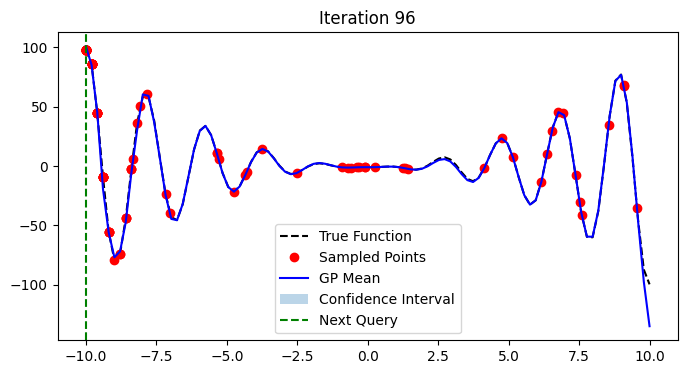

 96%|█████████▌| 96/100 [00:35<00:01,  2.79it/s]

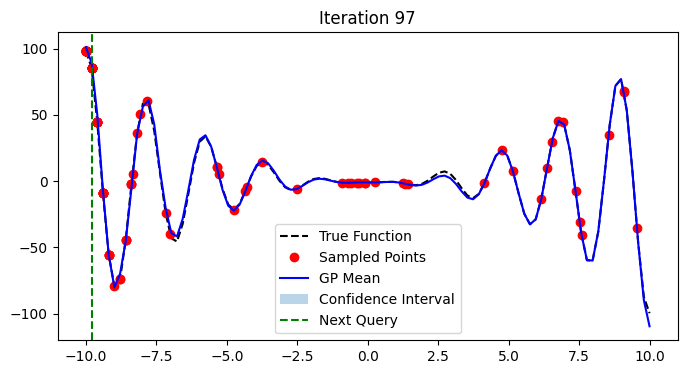

 97%|█████████▋| 97/100 [00:36<00:01,  2.76it/s]

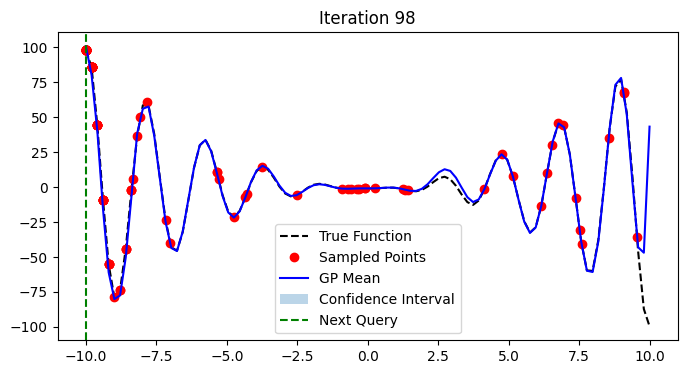

 98%|█████████▊| 98/100 [00:36<00:00,  2.75it/s]

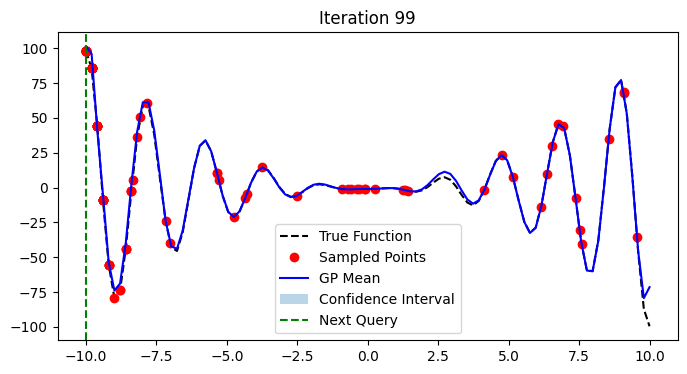

 99%|█████████▉| 99/100 [00:36<00:00,  2.64it/s]

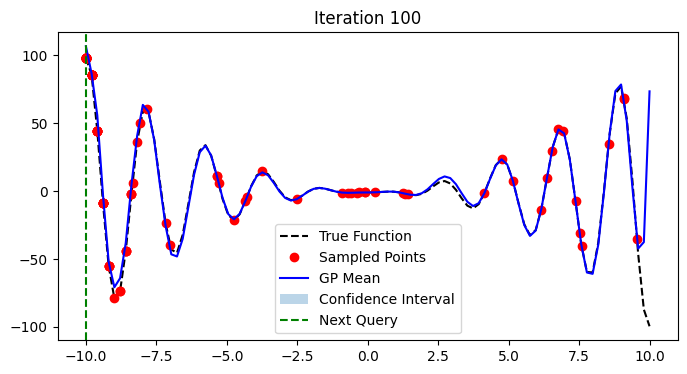

100%|██████████| 100/100 [00:37<00:00,  2.67it/s]

Optimal X: [-8.98989899], Optimal Value: -78.97247839936648


In [371]:
best_x, best_y = bayesian_optimization(n_iters=100)
print(f"Optimal X: {best_x}, Optimal Value: {best_y}")